In [8]:
import sys 

# Install all dependencies
#!{sys.executable} -m pip install numpy pandas ipywidgets matplotlib plotly scipy pyvis jupyter inspect functools
#! pip install itables ipympl pylatexenc

# Change path as the folder adress you have put the library in 
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm

############# MISC IMPORTS ###############
from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True)

#%matplotlib widget
from IPython.display import display,HTML,Markdown
from IPython.display import IFrame

opt.columnDefs = [{"className": "dt-left", "targets": "_all"}]
opt.classes="display nowrap compact"
opt.scrollY="500px"
opt.scrollCollapse=True
opt.paging=False


pyIDEE

* Version 0.9
* Last update 2023/01/03
* Developped at the environmental justice program https://environmentaljustice.georgetown.edu/#
* Contact : Paul Valcke pv229@georgetown.edu

Welcome in PyIDEE, a modular library to prototype and study dynamical systems !
This library is oriented toward generation of macroeconomic complexity models

If you find bugs, want some new extensions, or help us improve the library, please create a new issue on github
If this is the first time you open this library, please look at the tutorial file in doc/tutorial.py or better, and execute it line by line.

The ipythonNotebook is at : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\doc\TUTORIALS\TUTORIAL.ipynb
If you want to customize pyIDEE (advancer users) like removing this message, edit : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_config.py


<IPython.core.display.Javascript object>

In [5]:
pgm.get_available_models()

Folder  \
__MINITEMPLATE__                                    
__TEMPLATE__                                        
CHIMES0                                    CHIMES   
monochimes                                 CHIMES   
Accessibility                          Components   
CESprod                                Components   
Climate_3Layers                        Components   
MultisectoralAggregates                Components   
GK                                           Core   
Goodwin                                      Core   
Goodwin_gooda                                Core   
GK_divexp                                Extended   
GK_Endo                                  Extended   
Goodwin-PiInPhi                          Extended   
Goodwin_CES                              Extended   
Goodwin_Endo                             Extended   
GEMMES_Coping2018                          GEMMES   
stochastic                          Miscellaneous   
LorenzSystem             Miscellaneous\Attractors   
reduced_G                           ReducedSystem   
reduced_GK                          ReducedSystem   
PDE-Diffusion                             Spatial   
PDE-Waves                                 Spatial   

                                                                    Preset  \
__MINITEMPLATE__                                                        []   
__TEMPLATE__                                                     [preset0]   
CHIMES0                  [Goodwin, 2Goodwin, 5Goodwin, SimpleBi, Simple...   
monochimes                                                       [Goodwin]   
Accessibility                                                   [3sectors]   
CESprod                                                          [preset0]   
Climate_3Layers                                                  [default]   
MultisectoralAggregates                                                 []   
GK                                                              [default2]   
Goodwin                                             [default, many-orbits]   
Goodwin_gooda                                       [default, many-orbits]   
GK_divexp                                                           [test]   
GK_Endo                                                                 []   
Goodwin-PiInPhi                                                      [zpi]   
Goodwin_CES                                                          [CES]   
Goodwin_Endo                                        [default, many-orbits]   
GEMMES_Coping2018                               [BAU, BAU_DAM, TRANSITION]   
stochastic                                                    [Onevar, 10]   
LorenzSystem                                           [Canonical example]   
reduced_G                                                               []   
reduced_GK                                                          [Fred]   
PDE-Diffusion                                                      [Basic]   
PDE-Waves                                                          [Basic]   

                                                       Short Documentation  
__MINITEMPLATE__                              MINIMAL FILE, solving exp(t)  
__TEMPLATE__             Template to write your model. This is the shor...  
CHIMES0                            Numerical core for multisectoral models  
monochimes                         Monosectoral core equivalent in ECHIMES  
Accessibility                         Adding accessibility into the system  
CESprod                             Transform production function to a CES  
Climate_3Layers          This is a 3-Layer CLimate model, that gives te...  
MultisectoralAggregates  State variables, monosectoral, calculated on a...  
GK                       Goodwin-Keen model: debt dynamics with residua...  
Goodwin                        Goodwin model: Stock-flow consistency core   
Goodwin_gooda                   Goodwin model with

## Initial conditions

Using matplotlib backend: module://ipympl.backend_nbagg
The following fields are defined in the model but not it the library :
	- statevar: ['productivity', 'deltaK', 'Cr']
	- parameter: ['Ipond', 'geff', 'fdelta']
The following fields are identified as parameters :
	- independant : ['delta', 'inflation', 'alpha', 'n', 'Xi', 'l', 'A', 'r', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['Dh', 'V', 'time']
	 - state variable : ['pi', 'omega', 'd', 'ROC', 'productivity', 'c', 'mu', 'nu', 'Cr', 'dotV']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['L', 'deltaK', 'Y', 'Pi', 'W', 'I', 'C', 'pi', 'omega', 'd', 'ROC', 'productivity', 'employment', 'nu', 'Cr', 'Ir', 'dotV', 'Phillips', 'c', 'mu', 'g']
	- differential: ['D', 'Dh', 'V', 'K', 'p', 'w', 'a', 'N', 'Delta', 'time']

Changing Dimensions: ['Tmax']

Changing Fields: ['geff']
Identified gef

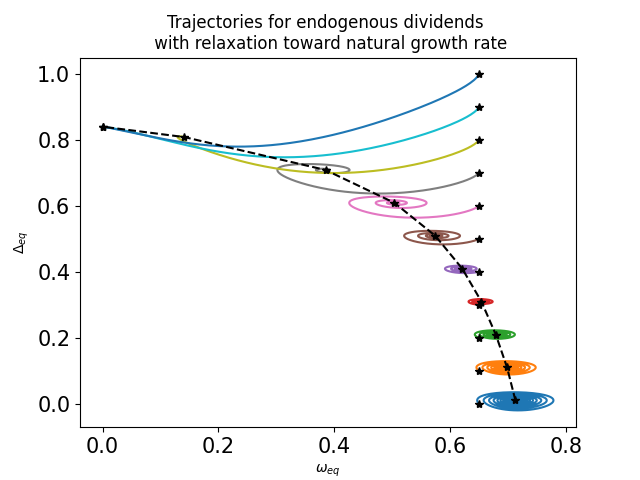

In [100]:
%matplotlib

Numsys=11
import numpy as np
import matplotlib.pyplot as plt
hub=pgm.Hub('monochimes',preset='Goodwin')
geff= 0.045
hub.set_dparam('Tmax',200)
hub.set_dparam('geff',geff)
hub.set_dparam('fdelta',1)
hub.set_dparam('nx',Numsys)
hub.set_dparam('Delta',np.linspace(0,1,Numsys))
hub.run()
#for i in range(10):
#    pgm.plots.XYZ(hub,'omega','employment','Delta',idx=i,title=r'$\Delta(t=0)='+f'{np.linspace(0,1,11)[i]}'+', g_{eff}$='+f'{geff}')
#hub.plot(filters_key=('mu'))

R=hub.dparam
for i in range(Numsys):
    plt.plot(R['omega']['value'][:,i,0,0,0],R['Delta']['value'][:,i,0,0,0],label=r'$\Delta(t=0)=$')
    plt.plot(R['omega']['value'][0,i,0,0,0],R['Delta']['value'][0,i,0,0,0],'*',c='k')
plt.plot(R['omega']['value'][-1,:,0,0,0],R['Delta']['value'][-1,:,0,0,0],'*--',c='k')
plt.xlabel('$\omega_{eq}$')
plt.ylabel('$\Delta_{eq}$')
plt.title('Trajectories for endogenous dividends \n with relaxation toward natural growth rate')
plt.show()

In [ ]:
Numsys=11
import numpy as np
import matplotlib.pyplot as plt
hub=pgm.Hub('monochimes',preset='Goodwin')
geff= np.linspace(0.03,0.05,Numsys)
hub.set_dparam('Tmax',200)
hub.set_dparam('geff',geff)
hub.set_dparam('fdelta',1)
hub.set_dparam('nx',Numsys)
hub.set_dparam('Delta',.1)
hub.run()
#for i in range(10):
#    pgm.plots.XYZ(hub,'omega','employment','Delta',idx=i,title=r'$\Delta(t=0)='+f'{np.linspace(0,1,11)[i]}'+', g_{eff}$='+f'{geff}')
#hub.plot(filters_key=('mu'))

R=hub.dparam
for i in range(Numsys):
    plt.plot(R['omega']['value'][:,i,0,0,0],R['Delta']['value'][:,i,0,0,0],label=r'$\Delta(t=0)=$')
    plt.plot(R['omega']['value'][0,i,0,0,0],R['Delta']['value'][0,i,0,0,0],'*',c='k')
plt.plot(R['omega']['value'][-1,:,0,0,0],R['Delta']['value'][-1,:,0,0,0],'*--',c='k')
plt.xlabel('$\omega_{eq}$')
plt.ylabel('$\Delta_{eq}$')
plt.title('Trajectories for endogenous dividends \n with relaxation toward natural growth rate')
plt.show()

In [27]:
hub.get_summary()

############################################################
####################      SUMMARY       ####################
############################################################
Model       : monochimes
Monosectoral core equivalent in ECHIMES
File        : C:\Users\Paul Valcke\Documents\GitHub\GEMMES\models\CHIMES\_model_monochimes.py
####################       Fields       ####################
statevar        020 ['L', 'Y', 'Pi', 'W', 'I', 'C', 'pi', 'omega', 'd', 'ROC', 'productivity', 'employment', 'nu', 'Cr', 'Ir', 'dotV', 'Phillips', 'c', 'mu', 'g']
differential    009 ['D', 'Dh', 'V', 'K', 'p', 'w', 'a', 'N', 'time']
parameters      022 ['delta', 'alpha', 'n', 'Xi', 'l', 'A', 'r', 'philinConst', 'philinSlope', 'inflation', 'gammai', 'Ipond', 'Cpond', 'Gamma', 'Delta', 'Nprod']
####################      Presets       ####################
          Goodwin       : Simple monosectoral
####################       Flags        ####################
run            : True
cycles     

In [35]:
hub.get_Network(params=True,auxilliary=True,filters=('mu','productivity','nu','g','Ir','Cr','c','d','Dh','p','ROC','pi','omega','gammai','inflation','l'))

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
C:\Users\Paul Valcke\Documents\GitHub\GEMMES\doc\monochimes.html


In [10]:
hub=pgm.Hub('monochimes',preset='Goodwin')
hub.run()
pgm.plots.XY(hub,'omega','employment','delta')

NameError: name '_LOGICS_CHANGEPARAM' is not defined

In [21]:
hub=pgm.Hub('monochimes',preset='Goodwin')
hub.get_summary()

The following fields are defined in the model but not it the library :
	- statevar: ['productivity', 'deltaK', 'Cr']
	- parameter: ['Ipond']
The following fields are identified as parameters :
	- independant : ['delta', 'inflation', 'alpha', 'n', 'Xi', 'l', 'A', 'r', 'Delta', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['Dh', 'V', 'time']
	 - state variable : ['pi', 'omega', 'd', 'ROC', 'productivity', 'c', 'mu', 'nu', 'g', 'Cr', 'dotV']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['L', 'deltaK', 'Y', 'Pi', 'W', 'I', 'C', 'pi', 'omega', 'd', 'ROC', 'productivity', 'employment', 'nu', 'Cr', 'Ir', 'dotV', 'Phillips', 'c', 'mu', 'g']
	- differential: ['D', 'Dh', 'V', 'K', 'p', 'w', 'a', 'N', 'time']
############################################################
####################      SUMMARY       ####################
###################

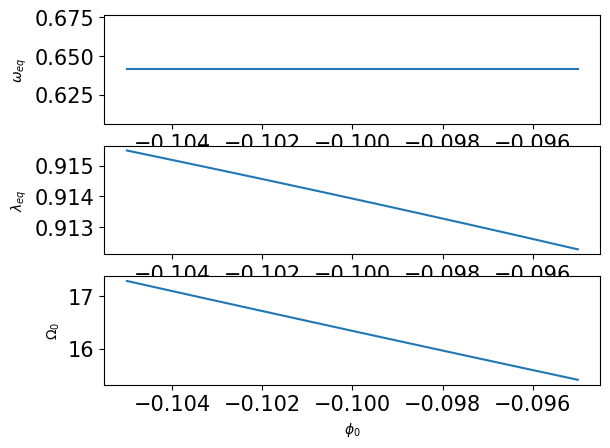

In [65]:
import numpy as np 
import matplotlib.pyplot as plt 

Gamma = .1
nu = 3
Xi = 1
delta = 0.03
alpha = 0.025
n = 0.02
Delta = 0.2
gammai = .5
inflation = 0.02
phi0 = -0.10
phi1 = .001

############################################
Modname = r'$\phi_0$'
phi0*=np.linspace(.95,1.05,10)
Modified = phi0
############################################

phim1    = lambda  x,phi0,phi1 : 1-np.sqrt(phi1/(x-phi0))
phiprim  = lambda x,phi1 : phi1*2/(1-x)**3 
omegaEQ  = 1-Gamma-nu*Xi*delta-nu*Xi*(alpha+n)/(1-Delta)
lambdaEQ = phim1( alpha + (1 - gammai)*inflation,phi0,phi1)
Omega0   = lambdaEQ*omegaEQ*phiprim(lambdaEQ,phi1)*(1-Delta)/(nu*Xi*delta)

plt.figure()
plt.subplot(311);plt.plot(Modified,omegaEQ+0*Modified); plt.ylabel(r'$\omega_{eq}$')
plt.subplot(312);plt.plot(Modified,lambdaEQ+0*Modified); plt.ylabel(r'$\lambda_{eq}$')
plt.subplot(313);plt.plot(Modified,Omega0+0*Modified); plt.ylabel(r'$\Omega_{0}$')
plt.xlabel(Modname)
plt.show()

Using matplotlib backend: module://ipympl.backend_nbagg
The following fields are defined in the model but not it the library :
	- statevar: ['productivity', 'deltaK', 'Cr']
	- parameter: ['Ipond', 'ftime']
The following fields are identified as parameters :
	- independant : ['delta', 'inflation', 'alpha', 'n', 'Xi', 'l', 'A', 'r', 'phinull']
	- function of other parameters : ['phi0', 'phi1']
The following variables are identified as auxilliary :
	 - differential : ['Dh', 'V']
	 - state variable : ['pi', 'omega', 'd', 'ROC', 'productivity', 'c', 'mu', 'nu', 'g', 'Cr', 'dotV']
The following order has been determined for functions:
	- parameter: ['nt', 'phi0', 'phi1']
	- statevar: ['L', 'deltaK', 'Y', 'Pi', 'Delta', 'pi', 'omega', 'd', 'ROC', 'productivity', 'employment', 'nu', 'W', 'I', 'C', 'Phillips', 'c', 'mu', 'Cr', 'Ir', 'dotV', 'g']
	- differential: ['D', 'Dh', 'V', 'K', 'p', 'w', 'a', 'N', 'time']

time step 1000 / 1000


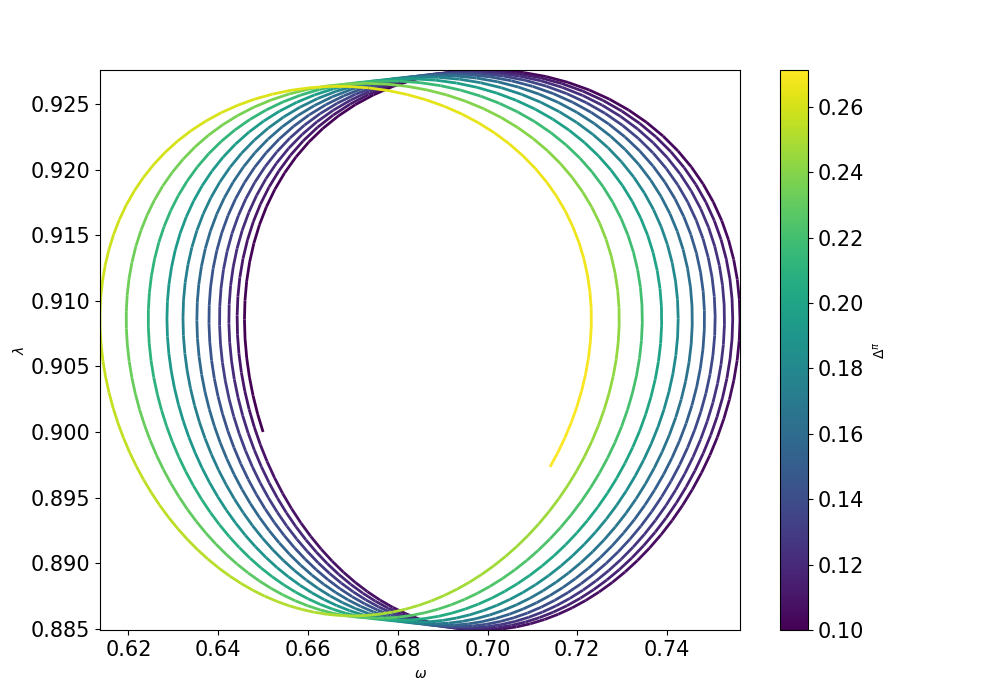

In [78]:
%matplotlib 
hub=pgm.Hub('monochimes',preset='Goodwin')
hub.run()
pgm.plots.XY(hub,'omega','employment','Delta')
#pgm.plots.cycles_characteristics(hub,'omega','employment',ref='employment',type1='stdval')